<a href="https://colab.research.google.com/github/TasnimeAyed/liar_dataset/blob/master/analise_sentimento_Preorocessing_lemmatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install language detection (english)

In [38]:
!pip install langdetect



# Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Install spaCy (run in terminal/prompt)
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en
import spacy

import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import string
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer 

import re
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
from gensim import corpora
import gensim
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer



✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Get the Data

In [0]:
uri_train  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/train.tsv'
uri_valid  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/valid.tsv'
uri_test  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/test.tsv'

In [41]:
#the train dataset

df_train = pd.read_table(uri_train,
                             names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	
                                        'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
df_train.head(2)
df_train.describe()
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job              7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  venue            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [42]:
#the valid dataset


df_valid = pd.read_table(uri_valid,
                             names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                       'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

df_valid.head(2)
df_valid.describe()
df_valid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job              939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  venue            1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [43]:
#the test dataset


df_test = pd.read_csv(uri_test, sep='\t', 
                            names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                      'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue']) 
df_test.head(2)
df_test.describe()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job              942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  venue            1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [44]:
df = pd.concat([df_train, df_valid])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11524 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11524 non-null  object 
 1   label            11524 non-null  object 
 2   statement        11524 non-null  object 
 3   subject          11522 non-null  object 
 4   speaker          11522 non-null  object 
 5   job              8282 non-null   object 
 6   state            9037 non-null   object 
 7   party            11522 non-null  object 
 8   barely_true_c    11522 non-null  float64
 9   false_c          11522 non-null  float64
 10  half_true_c      11522 non-null  float64
 11  mostly_true_c    11522 non-null  float64
 12  pants_on_fire_c  11522 non-null  float64
 13  venue            11410 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


# Features correlations with each other and with the target


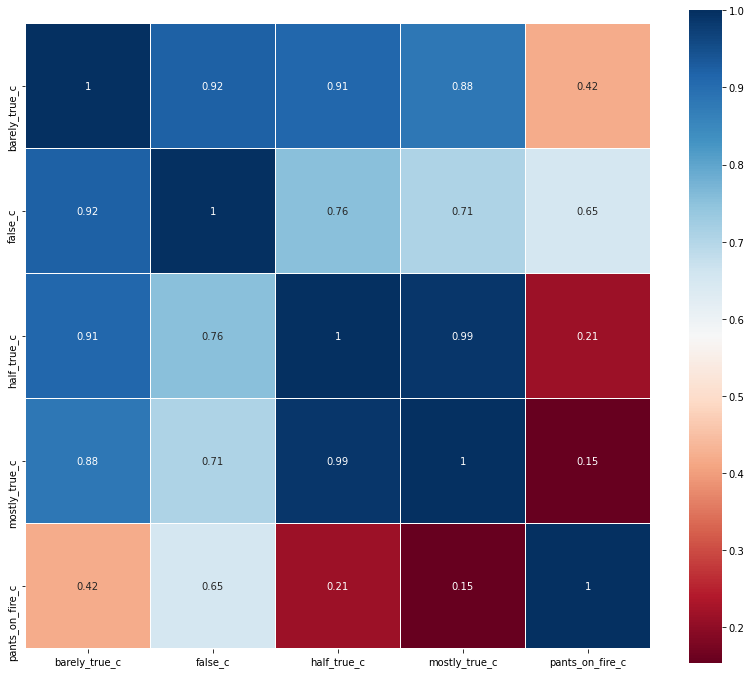

In [45]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.savefig('/content/correlation.png', dpi=None, facecolor='w',
                edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)

Step I: Preprocessing (Data preparation)

In [0]:
#converting text to numerical data in two steps: 
#1- Lemmatizing: bringing all words back to their ‘base form’ in order to make an easier word count
#2- Vectorizing: applying an algorithm that is based on wordcount (more advanced)

In [0]:
liar_list = [df,df_test]
#liar_list.head(2)

